<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы на графах. Занятие № 5

## Задача о кратчайшем пути


В **задаче о кратчайшем пути** (shortest-paths problem) задается взвешенный
ориентированный граф $G = (V,E)$ с весовой функцией $w : E → R$, отображаю-
щей ребра на их веса, значения которых выражаются действительными числами.
Вес (weight) пути $p = <v_0, v_1, . . . , v_k>$ равен суммарному весу входящих в него
ребер:

$$ w (p) = \sum_{i=1}^k
w (v_{i−1}, v_i). $$

**Вес кратчайшего пути** (shortest-path weight) из вершины $u$ в вершину $v$ определяется соотношением
	\begin{equation*}
δ (u, v) =
 \begin{cases}
   min \{w(p):u    \overset{p}{↝}  v\} & \\
   \inf \overset{}{} \\
 \end{cases}
\end{equation*}


Варианты задачи о кратчайшем пути
  * **Задача о кратчайшем пути в заданный пункт назначения** (single-destination
shortest-paths problem). Требуется найти кратчайший путь в заданную
вершину назначения (destination vertex) $t$, который начинается в каждой из
вершин $v$. Поменяв направление каждого принадлежащего графу ребра, эту
задачу можно свести к задаче о единой исходной вершине.



  * **Задача о кратчайшем пути между заданной парой вершин** (single-pair
shortest-paths problem). Требуется найти кратчайший путь из заданной вер-
шины $u$ в заданную вершину $v$. Если решена задача о заданной исходной
вершине $u$, то эта задача тоже решается. Более того, для этой задачи не
найдено ни одного алгоритма, который бы в асимптотическом пределе был
производительнее, чем лучшие из известных алгоритмов решения задачи об
одной исходной вершине в наихудшем случае.


  * **Задача о кратчайшем пути между всеми парами вершин** (all-pairs shortestpaths
problem). Требуется найти кратчайший путь из каждой вершины $u$
в каждую вершину $v$. Эту задачу тоже можно решить с помощью алго-
ритма, предназначенного для решения задачи об одной исходной вершине,
однако обычно она решается быстрее. Кроме того, структура этой задачи
представляет интерес сама по себе.




**Лемма 24.1 (Частичные пути кратчайшего пути являются кратчайшими путями.)**

Пусть $p = <v_1, v_2, . . . , v_k>$ — кратчайший путь из вершины $v_1$ к вершине
$v_k$ в заданном взвешенном ориентированном графе $G = (V,E)$ с весовой функ-
цией $ w : E → R$, а $p_{ij} = <v_i, v_{i+1}, . . . , v_j>$ — частичный путь пути p, который
проходит из вершины $v_i$ к вершине $v_j$ для произвольных $i$ и $j$, удовлетворяющих неравенству $1 ≤ i \le j \le k$. Тогда $p_{ij}$ — кратчайший путь из вершины $v_i$
к вершине $v_j$ .

<details>
<summary>Доказательство</summary>
Если разложить путь $p$ на составные части $v_1 \overset{p_{1i}}{↝} v_i \overset{p_{ij}}{↝} v_j \overset{p_{jk}}{↝} v_k$

то будет выполняться соотношение $w (p) = w (p_{1i}) + w (p_{ij}) + w (p_{jk})$. Теперь
предположим, что существует путь $p'_{
ij}$ из вершины $v_i$ к вершине $v_j$ , вес которого
удовлетворяет неравенству $w(p'_{ij}) < w(p_{ij})  $
Тогда $v_1 \overset{p_{1i}}{↝} v_i \overset{p'_{ij}}{↝} v_j \overset{p_{jk}}{↝} v_k$ путь из вершины  $v_1$ к вершине $v_k$, вес которого $ w (p_{1i}) + w (p'_{ij}) + w (p_{jk})$ меньше
веса $w (p)$. Это противоречит предположению о том, что $p$ — кратчайший путь из
вершины $v_1$ к вершине $v_k$.
&emsp;
</details>

<details>
<summary>Задача: Определен ли кратчайший путь, для графов с ребрами отрицательных весов?</summary>
Определен, если отстутствуют отрицательные циклы
&emsp;
</details>

Пусть $G = (V,E)$ — взвешенный ориентированный
граф с весовой функцией $w : E → R$. Предположим, что в нем не содержится
циклов с отрицательным весом, достижимых из истока $s ∈ V$ , а следовательно кратчайшие пути вполне определены. Тогда **дерево кратчайших путей** (shortestpaths
tree) с корнем в вершине $s$ — это ориентированный подграф $G' = (V',E')$,
в котором множества $V' ⊆ V$ и $E' ⊆ E$ определяются такими условиями:


1. V' — множество вершин, достижимых из истока s графа G:
2. граф G' образует корневое дерево с корнем в вершине s:
3. для всех $v∈V'$  однозначно определенный простой путь из вершины $s$ в вершину $v$ в графе $G'$ совпадает с кратчайшим путем из вершины $s$ в вершину
$v$ в графе $G$.



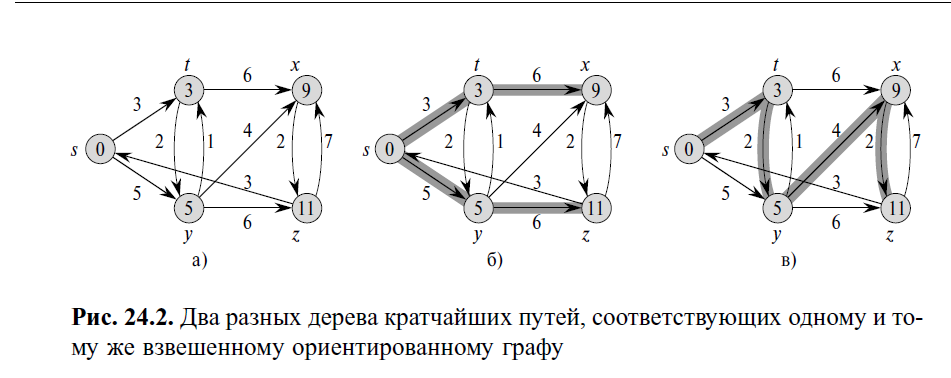

### Метод релаксации
Для каждой вершины $v∈V$ поддерживается атрибут $d [v]$,
представляющий собой верхнюю границу веса, которым обладает кратчайший
путь из истока $s$ в вершину $v$. Назовем атрибут $d [v]$ **оценкой кратчайшего пути** (shortest-path estimate). Инициализация оценок кратчайших путей и предше-
ственников производится в приведенной ниже процедуре, время работы которой
равно $O(V)$:

Процесс **ослабления (relaxation)** ребра $(u, v)$ заключается в проверке, нельзя
ли улучшить найденный до сих пор кратчайший путь к вершине $v$, проведя его
через вершину $u$, а также в обновлении атрибутов $d [v] \;и \;π [v]$ при наличии такой возможности улучшения. Ослабление может уменьшить оценку кратчайшего
пути $d [v]$ и обновить поле $π [v]$ вершины $v$.

$INITIALIZE\_SINGLE\_SOURCE(G, s)$<br>
$\quad \textbf{for}$ (Для) каждой вершины $v ∈ V [G]$<br>
$\quad \quad \textbf{do}\; d[v]←∞$<br>
$\quad \quad \quad π[v] ← NIL$<br>
$\quad d[s] ← 0$<br>

$RELAX(u, v,w)$<br>
$\quad \textbf{if} \; d[v] > d[u] + w(u, v)$<br>
$\quad \quad \textbf{then}\; d[v] ← d[u] + w(u, v)$<br>
$\quad \quad \quad  \quad \;\;π[v] ← u$<br>

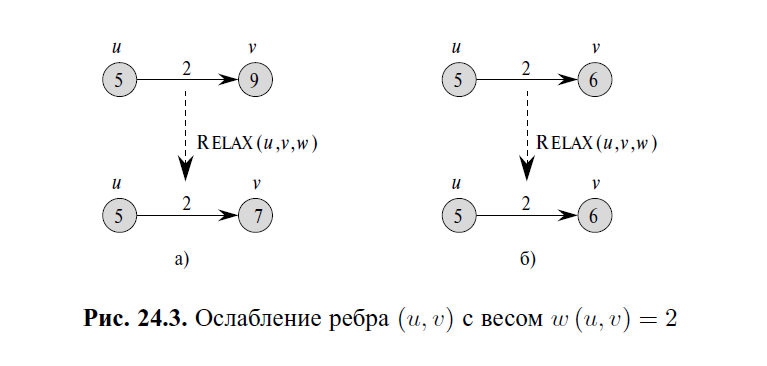

### Свойства кратчайших путей и релаксации


**Неравенство треугольника:**  Для каждого ребра $(u, v) ∈ $ выполняется неравенство $δ (s, v) \le δ (s, u) +
+ w (u, v)$. ($δ (s, v)$ - вес кратчайшего пути из $s$ в $v$)

**Свойство верхней границы:**
Для всех вершин $v ∈ V$ всегда выполняется неравенство $d [v] \ge δ (s, v)$,
а после того, как величина $d [v]$ становится равной $δ (s, v)$, она больше не
изменяется.

**Свойство отсутствия пути:**
Если из вершины $s$ в вершину $v$ нет пути, то всегда выполняется соотноше-
ние $d [v] = δ (s, v) = ∞$.


**Свойство сходимости:**
Если $s ↝ u → v$ — кратчайший в графе $G$ путь для некоторых вершин
$u, v ∈ V$ , и если равенство $d [u] = δ (s, u)$ выполняется в некоторый момент
времени до ослабления ребра $(u, v)$, то в любой момент времени после этого
$d [v] = δ (s, v)$.


**Свойство ослабления пути:**
Если $p = <v_0, v_1, . . . , v_k> — кратчайший путь из вершины $s = v_0$ в вершину
$v_k$, и ослабление ребер пути $p$ производится в порядке $(v_0, v_1)$, $(v_1, v_2)$, . . . ,
$(v_{k−1}, v_k)$, то $d [v_k] = δ (s, v_k)$. Это свойство выполняется независимо от
других этапов ослабления, даже если они чередуются с ослаблением ребер,
принадлежащих пути $p$.

**Свойство подграфа предшествования:**
Если для всех вершин $v ∈ V$ выполняется равенство $d [v] = δ (s, v)$, то подграф предшествования представляет собой дерево кратчайших путей с корнем в истоке $s$.

## Алгоритм Беллмана-Форда

**Алгоритм Беллмана-Форда** (Bellman-Ford algorithm) позволяет решить задачу о кратчайшем пути из одной вершины в общем случае, когда *вес каждого из
ребер может быть отрицательным.* Для заданного взвешенного ориентированного
графа $G = (V,E)$ с истоком $s$ и весовой функцией $w : E → R$ алгоритм Беллмана-Форда возвращает логическое значение, указывающее на то, содержится ли
в графе цикл с отрицательным весом, достижимый из истока. Если такой цикл
существует, в алгоритме указывается, что решения не существует. Если же таких
циклов нет, алгоритм выдает кратчайшие пути и их вес.

$BELLMAN\_FORD(G,w, s)$<br>
$ \quad INITIALIZE\_SINGLE\_SOURCE(G, s)$ <br>
$ \quad \textbf{for}\; i ← 1 \;to\; |V [G]| − 1$<br>
$ \quad \quad \textbf{do}\; \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$<br>
$ \quad \quad \quad\textbf{do}\; RELAX(u, v,w)$<br>
$ \quad \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$<br>
$ \quad \quad \textbf{do}\; \textbf{if}\; d[v] > d[u] + w(u, v)$<br>
$ \quad \quad \quad \textbf{then}\; \textbf{return}\; FALSE$<br>
$ \quad \textbf{return}\; TRUE$<br>

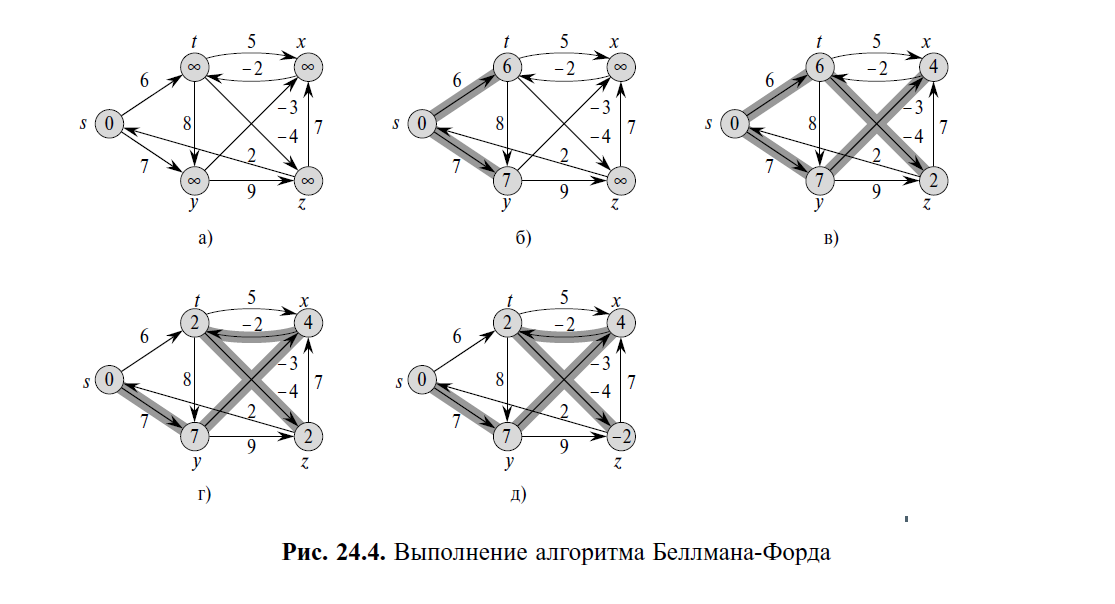

<details>
<summary>Сложность</summary>
$$O(V*E)$$
$BELLMAN\_FORD(G,w, s)$<br>
$ \quad INITIALIZE\_SINGLE\_SOURCE(G, s)$  // $O(V)$ <br>
$ \quad \textbf{for}\; i ← 1 \;to\; |V [G]| − 1$ // $O(V)$<br>
$ \quad \quad \textbf{do}\; \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$
 // $O(E)$<br>
$ \quad \quad \quad\textbf{do}\; RELAX(u, v,w)$   // $O(1)$<br>
$ \quad \textbf{for}\;$ (для) каждого ребра $(u, v) ∈ E[G]$  //  $O (E)$<br>
$ \quad \quad \textbf{do}\; \textbf{if}\; d[v] > d[u] + w(u, v)$<br>
$ \quad \quad \quad \textbf{then}\; \textbf{return}\; FALSE$<br>
$ \quad \textbf{return}\; TRUE$<br>
&emsp;
</details>


## Кратчайшие пути из одной вершины в ориентированных ациклических графах

Ослабляя ребра взвешенного ориентированного ациклического графа $G =
 (V,E)$ в порядке, определенном топологической сортировкой его вершин, крат-
чайшие пути из одной вершины можно найти в течение времени $O
(V + E)$. В ориентированном ациклическом графе кратчайшие пути всегда вполне определены,
поскольку даже если у некоторых ребер вес отрицателен, циклов с отрицательны-
ми весами не существует.

$DAG\_SHORTEST\_PATHS(G,w, s)$<br>
$\quad $Топологическая сортировка вершин графа $G$<br>
$\quad INITIALIZE\_SINGLE\_SOURCE(G, s)$<br>
$\quad \textbf{for}\; $(для) каждой вершины u в порядке топологической сортировки<br>
$\quad \quad \textbf{do}\; \textbf{for}\;$ (Для) каждой вершины $v ∈ Adj [u]$<br>
$\quad \quad \quad \textbf{do}\; RELAX(u, v,w)$<br>

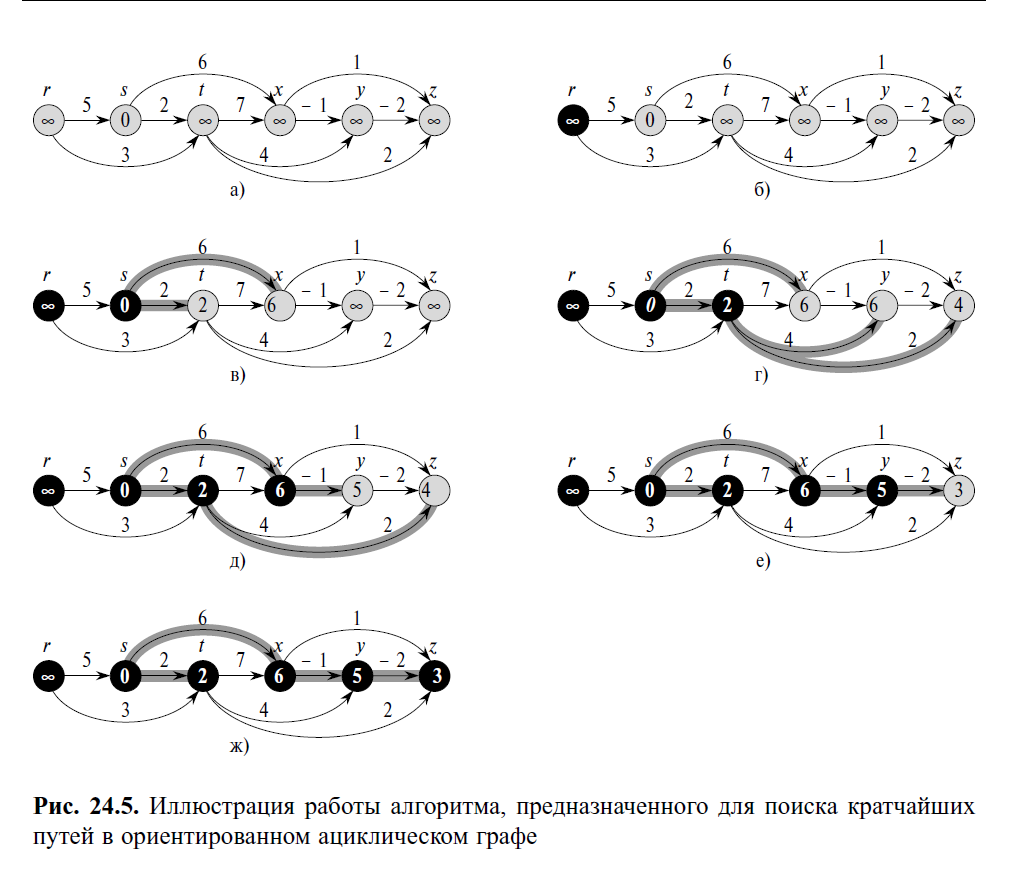

## Критический путь


Критический путь (critical path) —
самый длинный путь по ориентированному ациклическому графу, соответствующий самому длительному времени, необходимому для выполнения упорядоченной
последовательности заданий. Вес критического пути равен нижней границе полного времени выполнения всех заданий. Критический путь можно найти одним
из таких двух способов:
* заменить знаки всех весов ребер и выполнить алгоритм $DAG\_SHORTEST\_
PATHS$;
* воспользоваться модифицированным алгоритмом $DAG\_SHORTEST\_PATHS$, за-
менив в строке 2 процедуры $INITIALIZE\_SINGLE\_SOURCE$ значение $∞$ значе-
нием $−∞$, а в процедуре $RELAX$ — знак “$>$” знаком “$<$”.

<details>
<summary>Задание</summary>
Выполните поиск критических путей из вершины r на рис 24.5
&emsp;
</details>

## Алгоритм Дейкстры

Алгоритм Дейкстры решает задачу о кратчайшем пути из одной вершины во
взвешенном ориентированном графе $G = (V,E)$ в том случае, когда веса ребер
**неотрицательны**. Поэтому в настоящем разделе предполагается, что для всех ребер
$(u, v) ∈ E$ выполняется неравенство $w (u, v) \ge 0$.

https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%94%D0%B5%D0%B9%D0%BA%D1%81%D1%82%D1%80%D1%8B

$DIJKSTRA(G,w, s)$<br>
$\quad INITIALIZE\_SINGLE\_SOURCE(G, s)$<br>
$\quad S ← ∅$<br>
$\quad Q ← V [G]$<br>
$\quad \textbf{while}\; Q \neq  ∅$<br>
$\quad \quad \textbf{do}\; u ← EXTRACT\_MIN(Q)$<br>
$\quad \quad \quad S ← S ∪ {u}$<br>
$\quad \quad \quad \textbf{for} \; $(для) каждой вершины $v ∈ Adj [u]$<br>
$\quad \quad \quad \quad \textbf{do} \; RELAX(u, v,w)$<br>

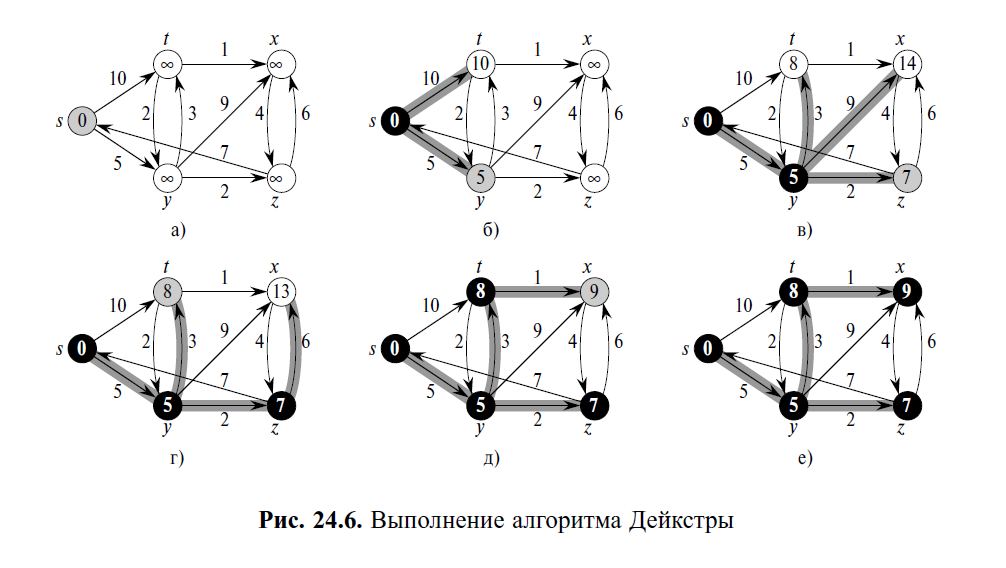

<details>
<summary>Сложность</summary>
$DIJKSTRA(G,w, s)$<br>
$\quad INITIALIZE\_SINGLE\_SOURCE(G, s)$    \\ $O(V)$<br>
$\quad S ← ∅$<br>
$\quad Q ← V [G]$ \\ всего insert вызывавется V раз<br>
$\quad \textbf{while}\; Q \neq  ∅$ \\\ $O(V)$<br>
$\quad \quad \textbf{do}\; u ← EXTRACT\_MIN(Q)$   \\\ всего extract вызывается V раз  $$<br>
$\quad \quad \quad S ← S ∪ {u}$<br>
$\quad \quad \quad \textbf{for} \; $(для) каждой вершины $v ∈ Adj [u]$ \\\ всего $2E$ раз  <br>
$\quad \quad \quad \quad \textbf{do} \; RELAX(u, v,w)$    \\\ операция decrease key<br>


итого
$$O(V + V * insert\_complexity +  V*extract\_min\_complexity+ 2*E*decrease\_key\_complexity$$

очередь с приоритетами  - **массив**
* $insert = O(1)$ (храним в массиве ключ -1, если вершина не в нем)
* $decrease = O(1)$
* $ extract\_min = O(V)$
$$O(V+ V*1 +V*V+ 2E*1)= O(V^2 + V + E) = O(V^2 +E)$$


очередь с приоритетами  - **биноминальная пирамида**
* $insert = O(lg(V))$
* $decrease = O(lg(V))$
* $ extract\_min = O(lg(V))$
$$O(V+ V*lg(V) +V*lg(V)+ 2E*lg(V))= O((V + E)lg(V)) = O(E*lg(V))$$

очередь с приоритетами  - **фибоначиева пирамида**
* $insert = O(1)$
* $decrease = O(1)$
* $ extract\_min = O(lg(V))$
$$O(V+ V*1 +V*lg(V)+ 2E*1)= O(V+V*lg(V)+E) = O(V*lg(V) + E)$$

&emsp;
</details>

<details>
<summary>Задание</summary>
Приведите простой пример ориентированного графа с отрицательными
весами ребер, для которого алгоритм Дейкстры дает неправильные ответы. Объясните результат.
&emsp;
</details>


<details>
<summary>Пример ответа</summary>

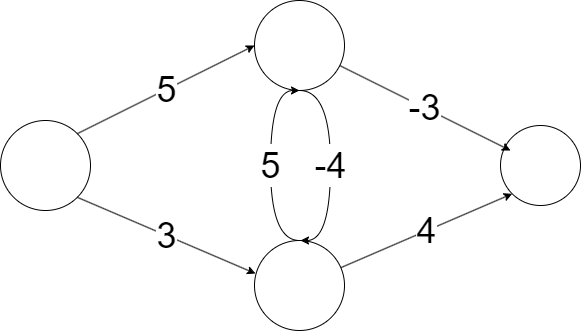
&emsp;
</details>